In [1]:
!gdown 1qeJqFtRdjjHqExbWJcgKy0yJbczTTAE3

Downloading...
From: https://drive.google.com/uc?id=1qeJqFtRdjjHqExbWJcgKy0yJbczTTAE3
To: d:\AIO\AIO2024_Excerises\module03\module03_week04\Housing.csv

  0%|          | 0.00/30.0k [00:00<?, ?B/s]
100%|██████████| 30.0k/30.0k [00:00<?, ?B/s]


In [2]:
import numpy as np
import pandas as pd
import matplotlib . pyplot as plt

from sklearn . tree import DecisionTreeRegressor
from sklearn . ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn . preprocessing import OrdinalEncoder, StandardScaler
from sklearn . model_selection import train_test_split
from sklearn . metrics import mean_absolute_error, mean_squared_error

In [3]:
dataset_path = 'Housing.csv'
df = pd.read_csv(dataset_path)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# Categorial Encoding

In [4]:
categorical_cols = df. select_dtypes(include=['object']).columns.to_list()
categorical_cols

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

In [5]:
ordinal_encoder = OrdinalEncoder()
encoded_categorical_cols = ordinal_encoder.fit_transform(df[categorical_cols])
encoded_categorical_df = pd. DataFrame(
    encoded_categorical_cols, columns=categorical_cols)
numerical_df = df. drop(categorical_cols, axis=1)
encoded_df = pd. concat([numerical_df, encoded_categorical_df], axis=1)
encoded_df.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,13300000,7420,4,2,3,2,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,12250000,8960,4,4,4,3,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,12250000,9960,3,2,2,2,1.0,0.0,1.0,0.0,0.0,1.0,1.0
3,12215000,7500,4,2,2,3,1.0,0.0,1.0,0.0,1.0,1.0,0.0
4,11410000,7420,4,1,2,2,1.0,1.0,1.0,0.0,1.0,0.0,0.0


# Nomalization

In [6]:
normalizer = StandardScaler()
dataset_arr = normalizer . fit_transform(encoded_df)

# Train test split

In [7]:
X, y = dataset_arr[:, 1:], dataset_arr[:, 0]

In [9]:
test_size = 0.3
random_state = 1
is_shuffle = True
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=test_size, random_state=random_state, shuffle=is_shuffle)

# Training & Evaluation

## Random Forest

In [10]:
regressor = RandomForestRegressor(random_state=random_state)
regressor .fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [11]:
y_pred = regressor . predict(X_val)

In [12]:
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)

print('Evaluation results on validation set :')
print(f'Mean Absolute Error : {mae}')
print(f'Mean Squared Error : {mse}')

Evaluation results on validation set :
Mean Absolute Error : 0.46093873321571177
Mean Squared Error : 0.37944418523089524


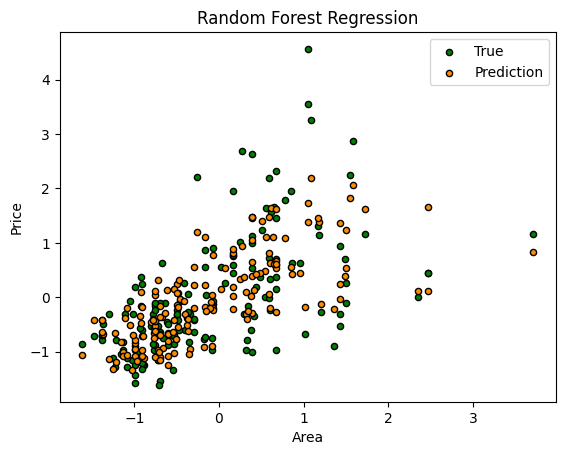

In [13]:
plt.figure()
plt.scatter(X_val[:, 0], y_val, s=20,
            edgecolor="black", c="green", label="True")
plt.scatter(X_val[:, 0], y_pred, s=20, edgecolor="black",
            c="darkorange", label="Prediction")
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Random Forest Regression")
plt.legend()
plt.show()

## AdaBoost

In [14]:
regressor = AdaBoostRegressor(random_state=random_state)
regressor .fit(X_train, y_train)

AdaBoostRegressor(random_state=1)

In [15]:
y_pred = regressor . predict(X_val)

In [16]:
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)

print('Evaluation results on validation set :')
print(f'Mean Absolute Error : {mae}')
print(f'Mean Squared Error : {mse}')

Evaluation results on validation set :
Mean Absolute Error : 0.567680019897059
Mean Squared Error : 0.5739244030038942


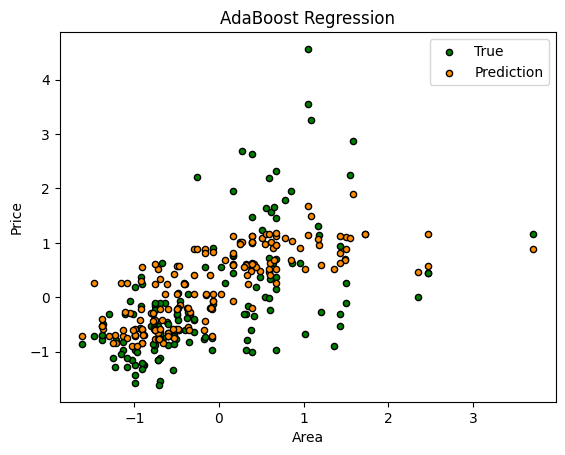

In [18]:
plt.figure()
plt.scatter(X_val[:, 0], y_val, s=20,
            edgecolor="black", c="green", label="True")
plt.scatter(X_val[:, 0], y_pred, s=20, edgecolor="black",
            c="darkorange", label="Prediction")
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("AdaBoost Regression")
plt.legend()
plt.show()

## Gradient Boosting

In [19]:
regressor = GradientBoostingRegressor(random_state=random_state)
regressor .fit(X_train, y_train)

GradientBoostingRegressor(random_state=1)

In [20]:
y_pred = regressor.predict(X_val)

In [21]:
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)

print('Evaluation results on validation set:')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')

Evaluation results on validation set:
Mean Absolute Error: 0.4516626127750995
Mean Squared Error: 0.39610445936979427


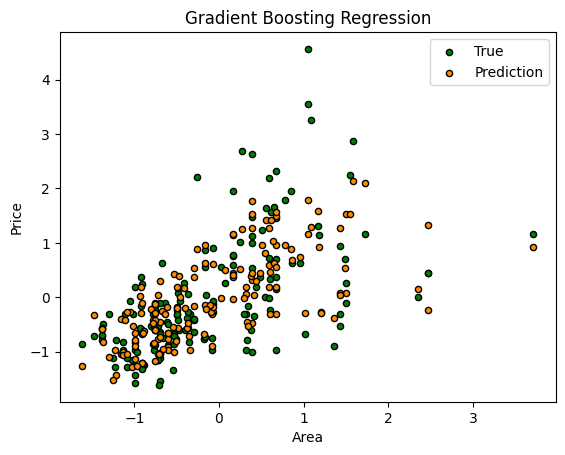

In [22]:
plt.figure()
plt.scatter(X_val[:, 0], y_val, s=20,
            edgecolor="black", c="green", label="True")
plt.scatter(X_val[:, 0], y_pred, s=20, edgecolor="black",
            c="darkorange", label="Prediction")
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Gradient Boosting Regression")
plt.legend()
plt.show()